**Segmentação de imagens**

Trata-se da seleção de objetos especificos em uma imagem.

Selecionar apenas objetos selecionados.

Dividir a imagem em regiões homogêneas da imagem.

Separar os objetos da imagem. Busca-se segmentar a imagem, sem levar em conta o que está presente na imagem.

O objetivo é apenas extrair as áreas da imagem. Pode ser considerada uma extensão da detecção de objetos.

**Técnicas e tipos de segmentação de imagem**

Técnicas:
- Técnicas clássicas: limirização (otsu, limiarização global ou adaptativa), baseada em bordas (Sobel e Canny Edge), baseada em regiões, baseada em grupos, watershed, por cor.
- Técnicas de rede neural: segmentação de instâncias (Mask RCNN, YOLACT etc.), segmentação semântica (U-net, DeepLab etc), segmentação panóptica (Detectron2 + DETR).

As tradicionais são menos eficientes, são necessários ajustes manuais para o algoritmo funcionar da melhor forma.

As de deep learning necessitam de um alto custo computacional.

Tipos:
- Semântica: trata os objetos da mesma classe da mesma forma;
- Instância: trata os objetos de forma diferente;
- Panóptica: junção das duas anteriores. 

**Pixels**

Pontos da imagem, menor informação disponível de uma imagem

São formados pelos canais RGB. 

O tamanho de uma imagem em escala de cinza é bem menor que o tamanho de uma imagem colorida

**Binarização**

Gera uma imagem com dois possíveis valores 0 e 255. Separando a imagem em duas partes.

Separar uma imagem em duas partes, a partir de um limiar.

Os três canais com o mesmo valor está na escala de cinza.

Método para a limiarização:

Imagem -> converter para a escala de cinza -> limiarização

**Tipos de limiarização**

- TRESH_BINARY: Pixels acima do limiar ficaram brancos (255) e abaixo ficaram pretos (0);
- TRESH_BINARY_INV: Inverso do anterior;
- THRESH_TOZERO: Pixels abaixo do limiar ficam pretos, o resto dos pixels é mantido;
- THRESH_TOZERO_INV: Inverso do anterior.
- THRESH_TRUNC: Tudo abaixo do limiar permanece como está, o que está acima fica com o valor de limiar fixo;

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!cp -R /content/gdrive/MyDrive/Mestrado/Cursos\ -\ Udemy/Segmentação\ de\ imagens/Segmentação\ Imagens\ Python\ AZ/imagens imagens/ 

**Limiarização Global**

Uso de um único valor de limiar aplicado em toda a imagem

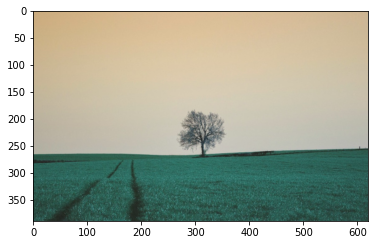

In [4]:
img = cv2.imread('/content/imagens/paisagem01.jpg')
plt.imshow(img);

In [5]:
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

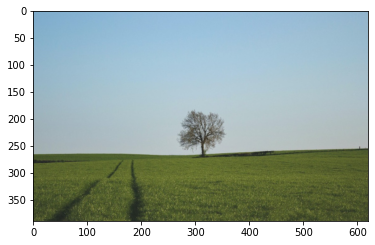

In [7]:
plt.imshow(imgRGB);

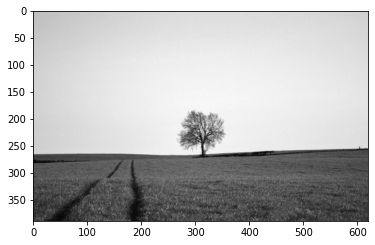

In [9]:
# Convertendo para a escala de cinza
imgCinza = cv2.cvtColor(imgRGB, cv2.COLOR_RGB2GRAY)
plt.imshow(imgCinza, cmap='gray');

In [10]:
limiar = 180

In [12]:
# limiar, imagem limiarizada
val, tresh = cv2.threshold(imgCinza, limiar, 255, cv2.THRESH_BINARY)

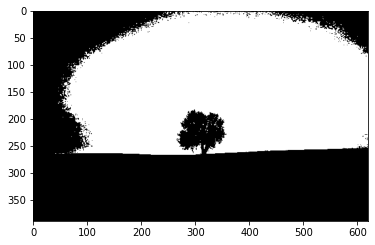

In [13]:
plt.imshow(tresh, cmap='gray');

In [14]:
def limiarizacao_global(imgCinza, limiar, isPlotImg):
  return cv2.threshold(imgCinza, limiar, 255, cv2.THRESH_BINARY)

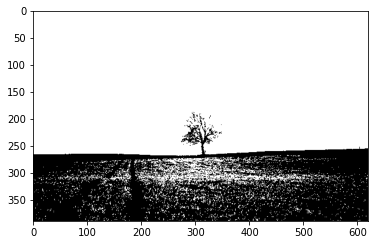

In [18]:
limiar = 100
val, tresh = val, tresh = cv2.threshold(imgCinza, limiar, 255, cv2.THRESH_BINARY)
plt.imshow(tresh, cmap='gray');

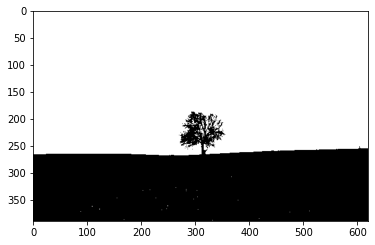

In [21]:
limiar = 140 #@param {type: "slider", min:0, max:255, step:1}
val, tresh = val, tresh = cv2.threshold(imgCinza, limiar, 255, cv2.THRESH_BINARY)
plt.imshow(tresh, cmap='gray');

In [22]:
def mostrar_imagem(imagem):
  fig = plt.gcf() # Limpa as configurações do gráfico
  fig.set_size_inches(18, 6)
  plt.imshow(imagem, cmap='gray')
  plt.axis('off')
  plt.show()

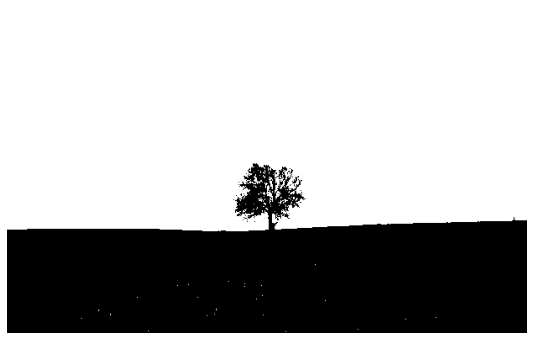

In [26]:
mostrar_imagem(tresh)

In [28]:
# Salvando a imagem
cv2.imwrite('resultado.jpg', tresh)

True

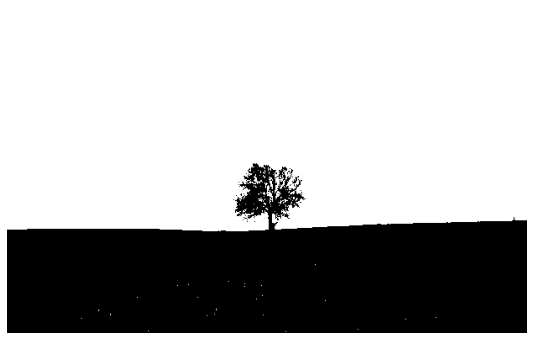

In [31]:
_, tresh = val, tresh = cv2.threshold(imgCinza, limiar, 255, cv2.THRESH_BINARY)
mostrar_imagem(tresh)

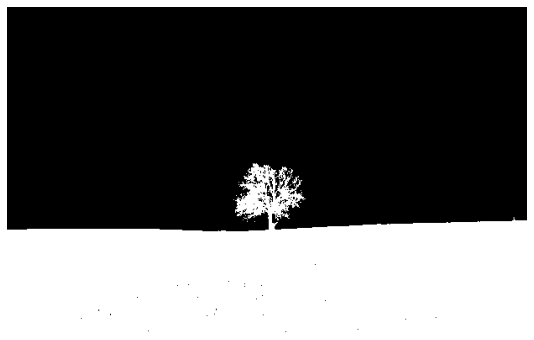

In [32]:
_, tresh = val, tresh = cv2.threshold(imgCinza, limiar, 255, cv2.THRESH_BINARY_INV)
mostrar_imagem(tresh)

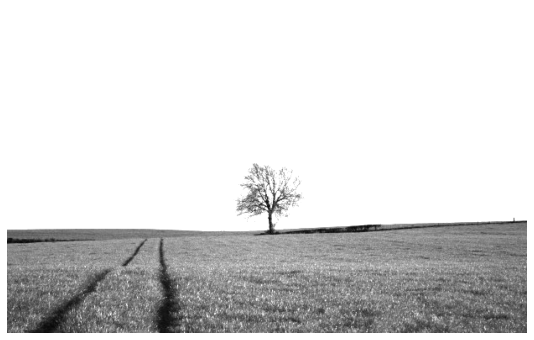

In [35]:
_, tresh = val, tresh = cv2.threshold(imgCinza, limiar, 255, cv2.THRESH_TRUNC)
mostrar_imagem(tresh)

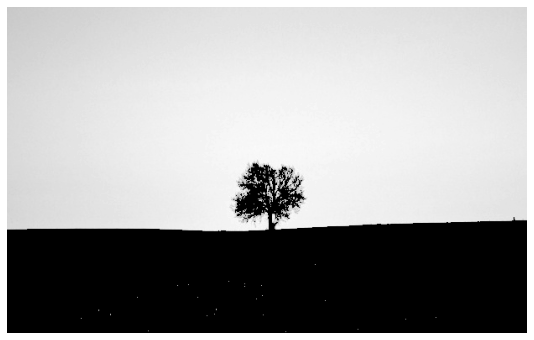

In [36]:
_, tresh = val, tresh = cv2.threshold(imgCinza, limiar, 255, cv2.THRESH_TOZERO)
mostrar_imagem(tresh)

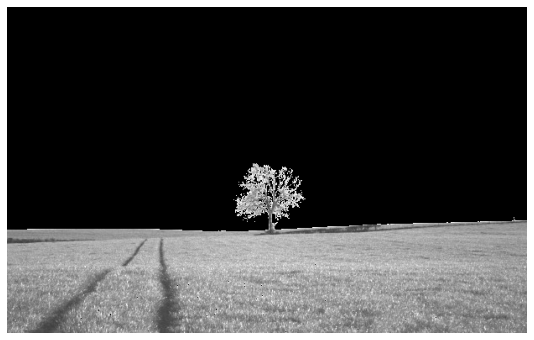

In [37]:
_, tresh = val, tresh = cv2.threshold(imgCinza, limiar, 255, cv2.THRESH_TOZERO_INV)
mostrar_imagem(tresh)

In [48]:
def exibir_limiarizacao(imagem, limiar = 127):
  _, tresh_binary = val, tresh = cv2.threshold(imagem, limiar, 255, cv2.THRESH_BINARY)
  _, tresh_binary_inv = val, tresh = cv2.threshold(imagem, limiar, 255, cv2.THRESH_BINARY_INV)
  _, tresh_trunc = val, tresh = cv2.threshold(imagem, limiar, 255, cv2.THRESH_TRUNC)
  _, tresh_tozero = val, tresh = cv2.threshold(imagem, limiar, 255, cv2.THRESH_TOZERO)
  _, tresh_tozero_inv = val, tresh = cv2.threshold(imagem, limiar, 255, cv2.THRESH_TOZERO_INV)

  titulos = ['Imagem original', 'Binary', 'Binary inv', 'Trunc', 'To zero', 'To zero inv']
  imagens = [imagem, tresh_binary, tresh_binary_inv, tresh_trunc, tresh_tozero, tresh_tozero_inv]

  fig = plt.gcf()
  fig.set_size_inches(18,12)

  for i in range(len(imagens)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(cv2.cvtColor(imagens[i], cv2.COLOR_BGR2RGB))
    plt.title(titulos[i])
    plt.xticks([])
    plt.yticks([])
  plt.show()

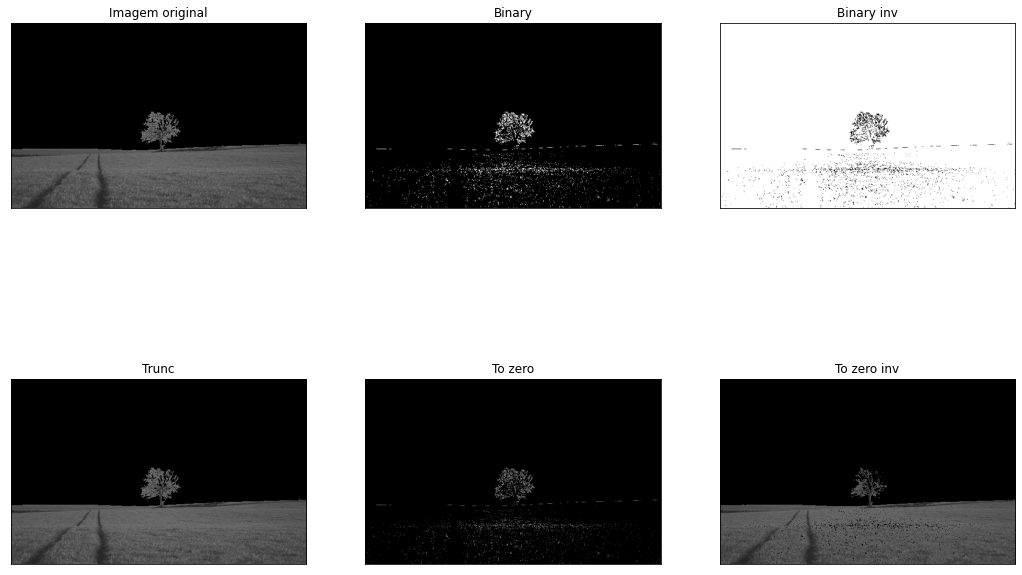

In [49]:
exibir_limiarizacao(tresh, limiar)

**Tomografia computadorizada**

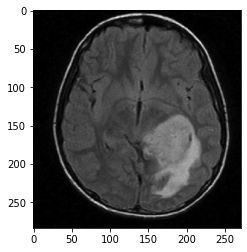

In [44]:
imagem = cv2.imread('/content/imagens/ct-scan.jpg')
imgCinza = cv2.cvtColor(imagem, cv2.COLOR_RGB2GRAY)

plt.imshow(imgCinza, cmap = 'gray')

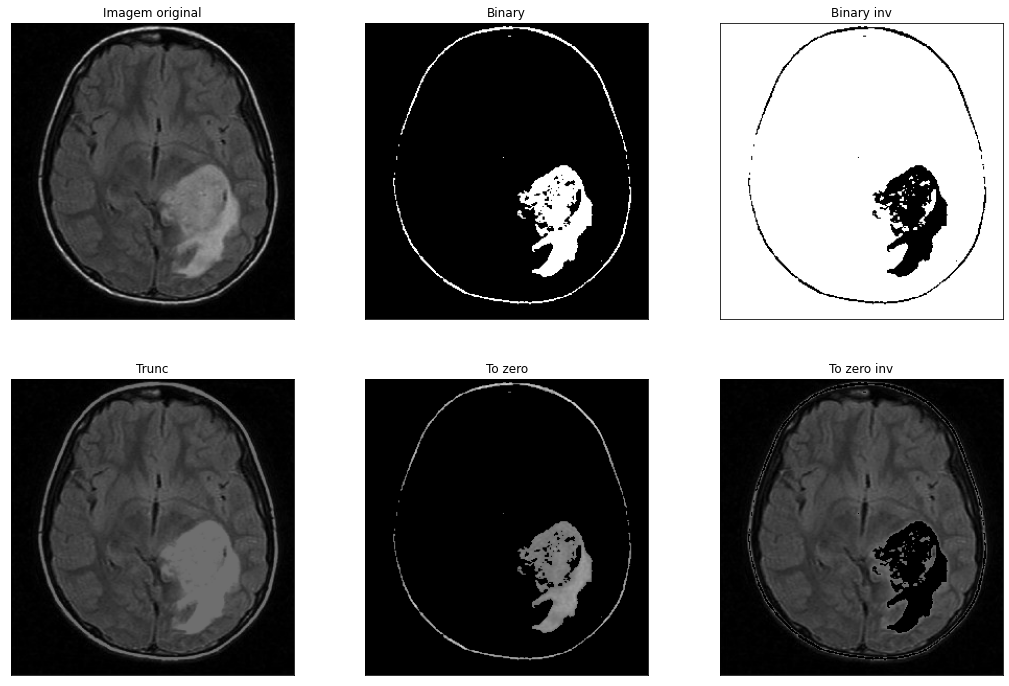

In [50]:
limiar = 110
exibir_limiarizacao(imgCinza, limiar)

**Imagem em infravermelho**

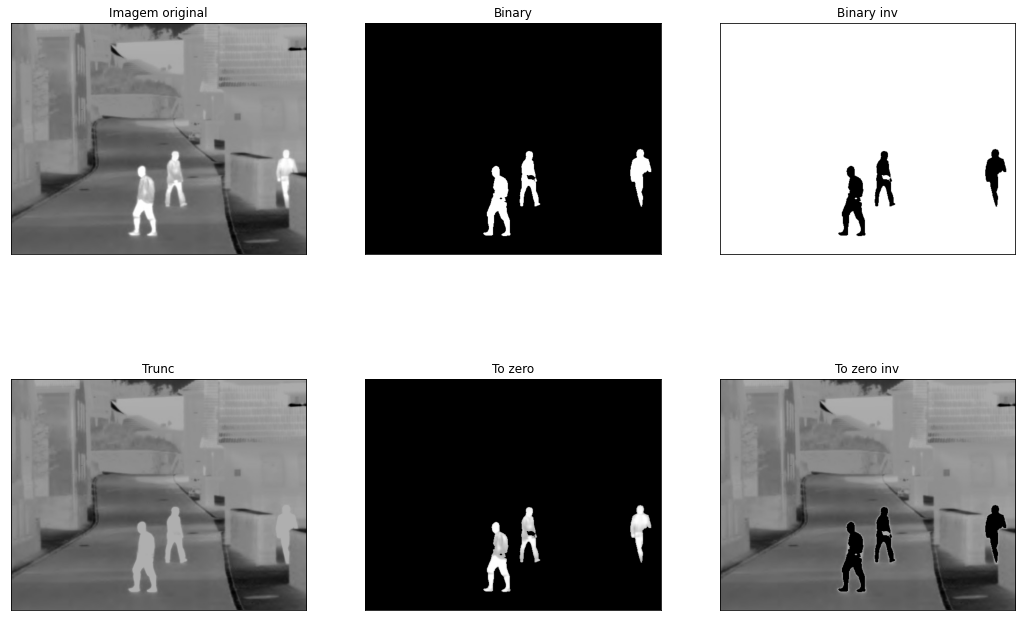

In [51]:
imagem = cv2.imread('/content/imagens/thermal01.jpg')
imgCinza = cv2.cvtColor(imagem, cv2.COLOR_RGB2GRAY)

limiar = 175
exibir_limiarizacao(imgCinza, limiar)

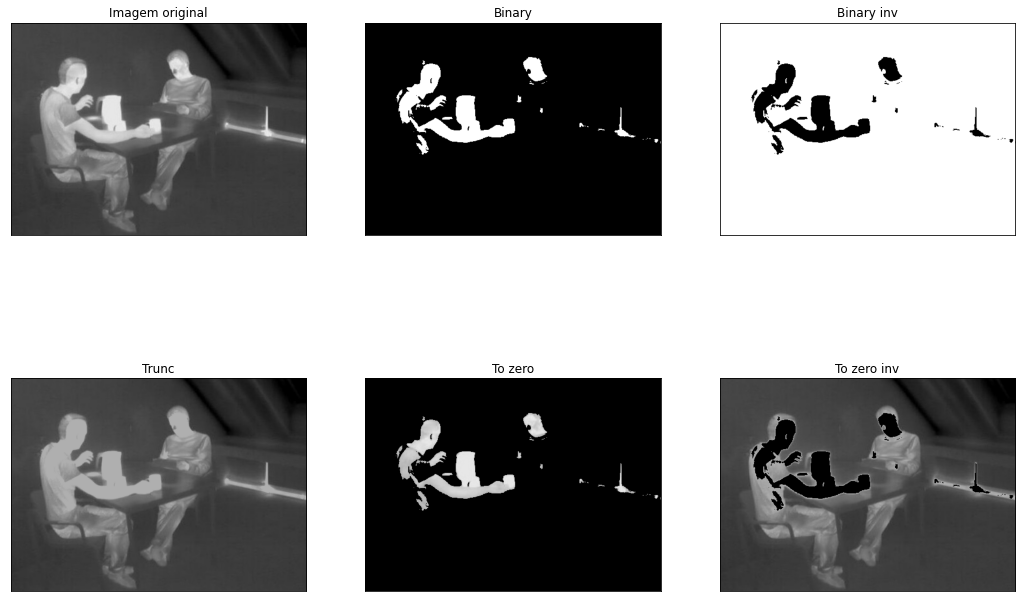

In [52]:
imagem = cv2.imread('/content/imagens/thermal02.jpg')
imgCinza = cv2.cvtColor(imagem, cv2.COLOR_RGB2GRAY)

limiar = 175
exibir_limiarizacao(imgCinza, limiar)

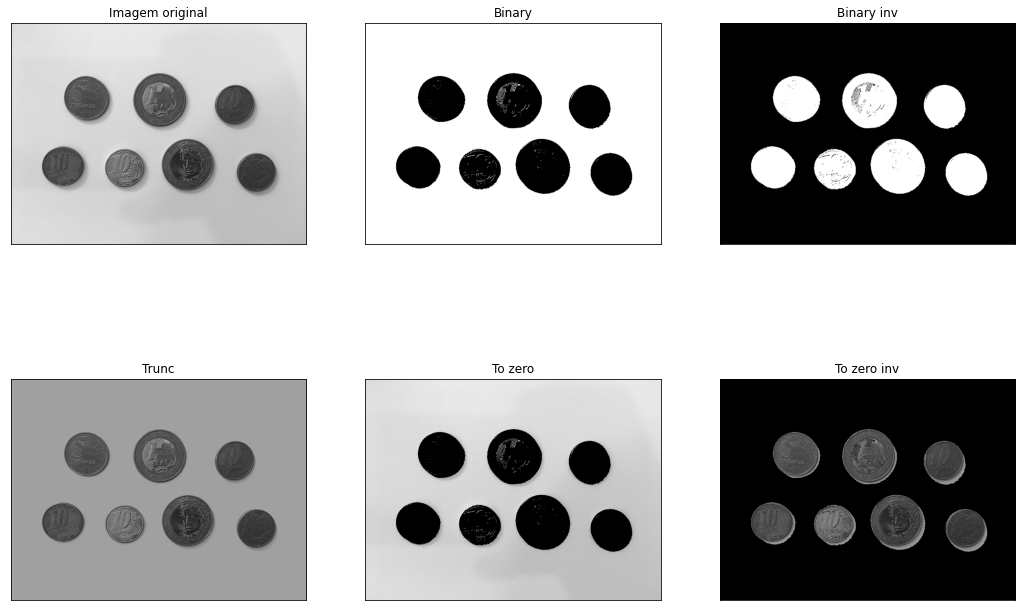

In [53]:
imagem = cv2.imread('/content/imagens/moedas01.jpg')
imgCinza = cv2.cvtColor(imagem, cv2.COLOR_RGB2GRAY)

limiar = 160
exibir_limiarizacao(imgCinza, limiar)